In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [109]:
# create a num ranked column
df = pd.read_csv('data/clean.csv')
df['ranking'] = df['ranking'].str.replace('nan', '')
df['ranking'] = df['ranking'].str.replace(',,', '')
df['num_ranked'] = 0
for i in range(len(df['ranking'])):
    df['num_ranked'][i] = len(df['ranking'][i].split(','))
df['num_ranked'] = (df['num_ranked'] - 1) // 2
df.head()


/var/folders/kg/hnwkrhks4jl7n3g4wwgnwt1h0000gn/T/ipykernel_61734/602384840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_ranked'][i] = len(df['ranking'][i].split(','))


,Timestamp,id,major_status,taken_courses,grad_semester,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,...,ranking_11,ranking_12,ranking_13,ranking_14,desired_amount_of_courses,percieved_amount_of_courses_needed,ranking_15,ranking_16,ranking,num_ranked
0,10/29/2023 18:04:33,0,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","310-1, ROBOTICS",...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,"303-1, DATABASE SYSTEMS,428-1, GENERATIVE DATA...",5
1,10/30/2023 14:54:36,1,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 205...",Spring 2025,"304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","496-1, RESEARCH SEMINAR",...,NaN,NaN,NaN,NaN,4,3,NaN,NaN,"304-1, ALGORITHMS,302-1, OBJECT-ORIENTED SOFTW...",7
2,10/31/2023 13:53:58,2,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"313-1, ALGORITHMIC GAME THEORY","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","214-1, WEB TECH","303-1, DATABASE SYSTEMS","315-1, COMPUTER NETWORKS",...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,"313-1, ALGORITHMIC GAME THEORY,302-1, OBJECT-O...",5
3,11/1/2023 12:36:27,3,intended CS major,COM 110 CC:INTRO COMP SCI & PROB SOLV,Spring 2027,"212-2, DATA STRUCTURES","212-1, DATA STRUCTURES",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,"212-2, DATA STRUCTURES,212-1, DATA STRUCTURES",1
4,10/23/2023 14:02:40,4,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"219-1, COMPUTER ORGANIZATION","304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","303-1, DATABASE SYSTEMS","310-1, ROBOTICS",...,"214-1, WEB TECH (TBD)",NaN,NaN,NaN,3,3,NaN,NaN,"219-1, COMPUTER ORGANIZATION,304-1, ALGORITHMS...",11


In [110]:
# add column for semesters remaining
df['semesters_remaining'] = 0
for i in range(len(df['grad_semester'])):
    remaining = 0
    remaining += (int(df['grad_semester'][i][-2:]) - 23) * 2
    if df['grad_semester'][i][0] == 'S':
        remaining -= 1
    df['semesters_remaining'][i] = remaining
df.head()

/var/folders/kg/hnwkrhks4jl7n3g4wwgnwt1h0000gn/T/ipykernel_61734/2302927244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['semesters_remaining'][i] = remaining


,Timestamp,id,major_status,taken_courses,grad_semester,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,...,ranking_12,ranking_13,ranking_14,desired_amount_of_courses,percieved_amount_of_courses_needed,ranking_15,ranking_16,ranking,num_ranked,semesters_remaining
0,10/29/2023 18:04:33,0,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","310-1, ROBOTICS",...,NaN,NaN,NaN,3,2,NaN,NaN,"303-1, DATABASE SYSTEMS,428-1, GENERATIVE DATA...",5,3
1,10/30/2023 14:54:36,1,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 205...",Spring 2025,"304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","496-1, RESEARCH SEMINAR",...,NaN,NaN,NaN,4,3,NaN,NaN,"304-1, ALGORITHMS,302-1, OBJECT-ORIENTED SOFTW...",7,3
2,10/31/2023 13:53:58,2,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"313-1, ALGORITHMIC GAME THEORY","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","214-1, WEB TECH","303-1, DATABASE SYSTEMS","315-1, COMPUTER NETWORKS",...,NaN,NaN,NaN,3,2,NaN,NaN,"313-1, ALGORITHMIC GAME THEORY,302-1, OBJECT-O...",5,3
3,11/1/2023 12:36:27,3,intended CS major,COM 110 CC:INTRO COMP SCI & PROB SOLV,Spring 2027,"212-2, DATA STRUCTURES","212-1, DATA STRUCTURES",NaN,NaN,NaN,...,NaN,NaN,NaN,1,1,NaN,NaN,"212-2, DATA STRUCTURES,212-1, DATA STRUCTURES",1,7
4,10/23/2023 14:02:40,4,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"219-1, COMPUTER ORGANIZATION","304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","303-1, DATABASE SYSTEMS","310-1, ROBOTICS",...,NaN,NaN,NaN,3,3,NaN,NaN,"219-1, COMPUTER ORGANIZATION,304-1, ALGORITHMS...",11,3


In [111]:
# remove (TBD) from the end of some web tech entries
df.replace(to_replace='214-1, WEB TECH (TBD)', value='214-1, WEB TECH', inplace=True)
print(df['ranking_1'].unique())

['303-1, DATABASE SYSTEMS' '304-1, ALGORITHMS'
 '313-1, ALGORITHMIC GAME THEORY' '212-2, DATA STRUCTURES'
 '219-1, COMPUTER ORGANIZATION' '302-1, OBJECT-ORIENTED SOFTWARE DESIGN'
 '214-1, WEB TECH' '315-1, COMPUTER NETWORKS' '212-1, DATA STRUCTURES'
 '428-1, GENERATIVE DATA MODELING' '310-1, ROBOTICS'
 '496-2, RESEARCH SEMINAR' nan]


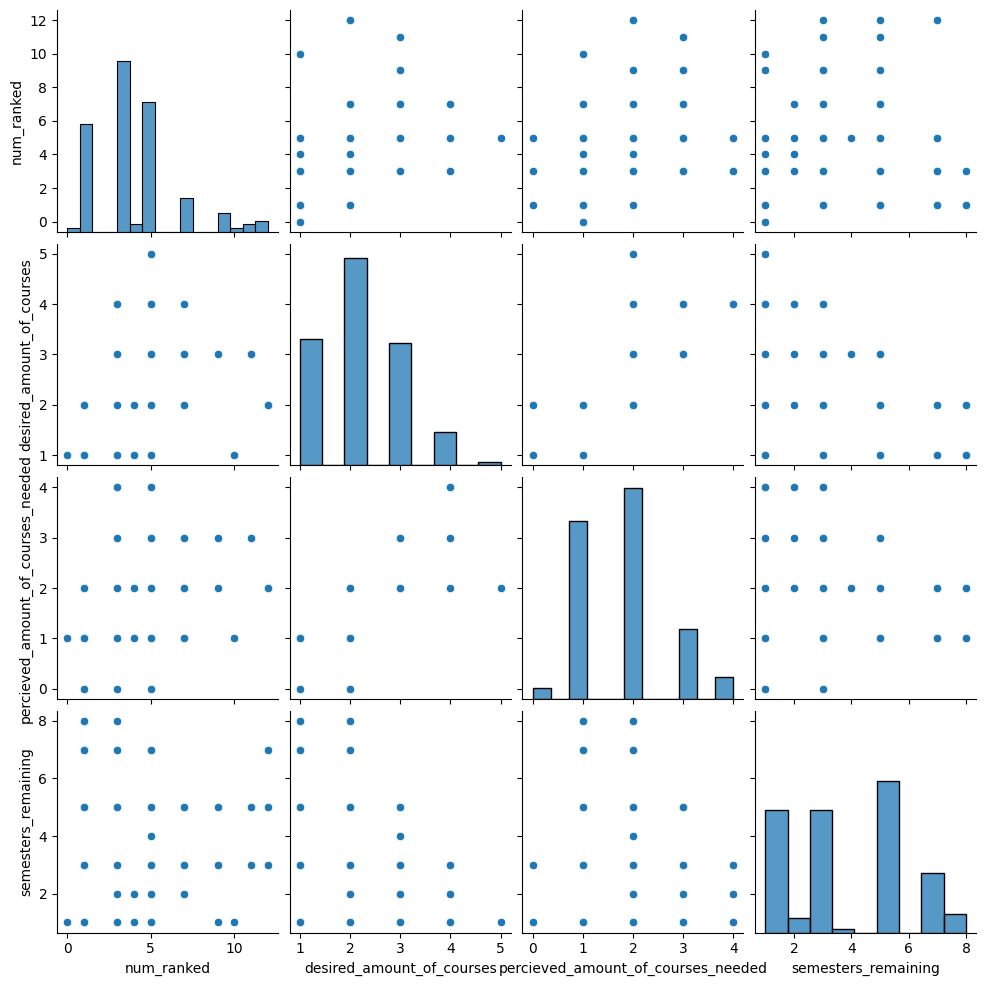

In [112]:
# pair wise plots for all numeric columns
sns.pairplot(
    df, 
    vars=[
        'num_ranked', 
        'desired_amount_of_courses',
        'percieved_amount_of_courses_needed',
        'semesters_remaining'
        ], 
    )
plt.show()

In [113]:
# Pearson correlations between all numeric columns
pearson = df[[
    "desired_amount_of_courses",
    "percieved_amount_of_courses_needed",
    "num_ranked",
    "semesters_remaining"
    ]].corr(method='pearson')
pearson

,desired_amount_of_courses,percieved_amount_of_courses_needed,num_ranked,semesters_remaining
desired_amount_of_courses,1.000000,0.803352,0.404302,-0.383343
percieved_amount_of_courses_needed,0.803352,1.000000,0.414263,-0.263219
num_ranked,0.404302,0.414263,1.000000,-0.150625
semesters_remaining,-0.383343,-0.263219,-0.150625,1.000000


In [114]:
# Spearman correlation between all numeric columns
spearman = df[[
    "desired_amount_of_courses",
    "percieved_amount_of_courses_needed",
    "num_ranked",
    "semesters_remaining"
    ]].corr(method='spearman')
spearman

,desired_amount_of_courses,percieved_amount_of_courses_needed,num_ranked,semesters_remaining
desired_amount_of_courses,1.000000,0.825877,0.522786,-0.351382
percieved_amount_of_courses_needed,0.825877,1.000000,0.523905,-0.256983
num_ranked,0.522786,0.523905,1.000000,-0.187784
semesters_remaining,-0.351382,-0.256983,-0.187784,1.000000


In [115]:
# which major status category is ranking the most courses, desireing?
grouped_df = df.groupby('major_status')['num_ranked'].agg(['mean', 'median', 'count', 'sum', 'std'])
grouped_df

,mean,median,count,sum,std
major_status,,,,,
CS minor,2.062500,1.0,16,33,1.340087
declared CS major,4.792683,5.0,82,393,2.507952
intended CS major,2.911765,3.0,34,99,2.416705
none of the above,1.000000,1.0,1,1,NaN


In [116]:
grouped_df = df.groupby('major_status')['desired_amount_of_courses'].agg(['mean', 'median', 'count', 'sum', 'std'])
grouped_df

,mean,median,count,sum,std
major_status,,,,,
CS minor,1.250000,1.0,16,20,0.447214
declared CS major,2.560976,2.0,82,210,0.802735
intended CS major,1.617647,1.5,34,55,0.696950
none of the above,1.000000,1.0,1,1,NaN


In [117]:
# which 1st ranked course indicated the most courses ranked, the most desired?
grouped_df = df.groupby('ranking_1')['num_ranked'].agg(['mean', 'median', 'count', 'sum', 'std'])
grouped_df

,mean,median,count,sum,std
ranking_1,,,,,
"212-1, DATA STRUCTURES",1.315789,1.0,19,25,0.749269
"212-2, DATA STRUCTURES",1.800000,1.0,5,9,1.095445
"214-1, WEB TECH",7.333333,7.0,3,22,2.516611
"219-1, COMPUTER ORGANIZATION",4.200000,3.0,20,84,2.375312
"302-1, OBJECT-ORIENTED SOFTWARE DESIGN",4.333333,3.0,12,52,2.605356
"303-1, DATABASE SYSTEMS",2.750000,3.0,8,22,1.669046
"304-1, ALGORITHMS",5.727273,5.0,22,126,2.711208
"310-1, ROBOTICS",5.333333,5.0,9,48,3.162278
"313-1, ALGORITHMIC GAME THEORY",3.000000,3.0,4,12,1.632993


In [118]:
grouped_df = df.groupby('ranking_1')['desired_amount_of_courses'].agg(['mean', 'median', 'count', 'sum', 'std'])
grouped_df

,mean,median,count,sum,std
ranking_1,,,,,
"212-1, DATA STRUCTURES",1.210526,1.0,19,23,0.535303
"212-2, DATA STRUCTURES",1.400000,1.0,5,7,0.547723
"214-1, WEB TECH",2.000000,2.0,3,6,1.000000
"219-1, COMPUTER ORGANIZATION",2.000000,2.0,20,40,0.648886
"302-1, OBJECT-ORIENTED SOFTWARE DESIGN",2.250000,2.0,12,27,0.621582
"303-1, DATABASE SYSTEMS",1.750000,2.0,8,14,0.707107
"304-1, ALGORITHMS",2.818182,3.0,22,62,0.852803
"310-1, ROBOTICS",2.333333,2.0,9,21,0.707107
"313-1, ALGORITHMIC GAME THEORY",2.000000,2.0,4,8,0.816497


In [119]:
# ranking_1 and major status crosstab
cross = pd.crosstab(df['ranking_1'], df['major_status'])
cross

major_status,CS minor,declared CS major,intended CS major,none of the above
ranking_1,,,,
"212-1, DATA STRUCTURES",6,0,12,1
"212-2, DATA STRUCTURES",1,1,3,0
"214-1, WEB TECH",0,3,0,0
"219-1, COMPUTER ORGANIZATION",0,7,13,0
"302-1, OBJECT-ORIENTED SOFTWARE DESIGN",1,10,1,0
"303-1, DATABASE SYSTEMS",3,5,0,0
"304-1, ALGORITHMS",0,20,2,0
"310-1, ROBOTICS",1,6,2,0
"313-1, ALGORITHMIC GAME THEORY",1,2,1,0


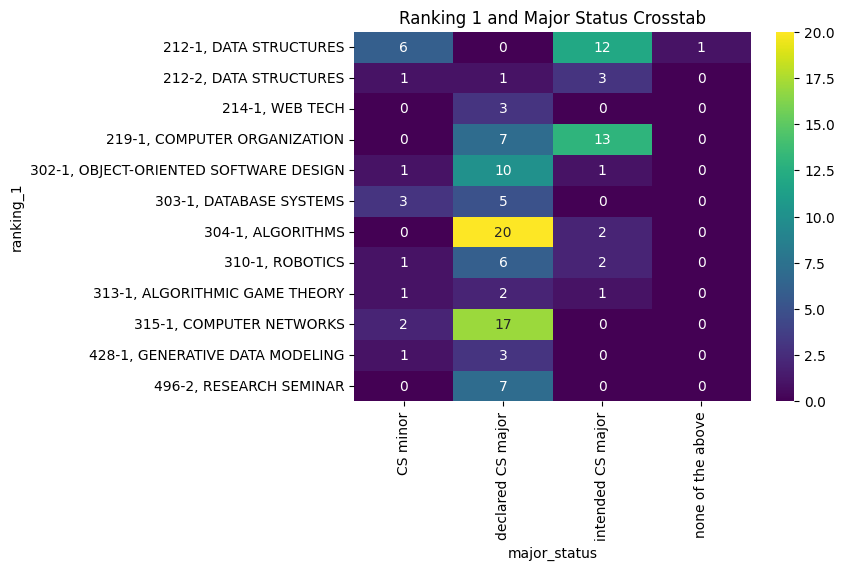

In [120]:
sns.heatmap(cross, annot=True, fmt="g", cmap='viridis')
plt.title('Ranking 1 and Major Status Crosstab')
plt.show()

In [121]:
# ranking_2 and major status crosstab
cross = pd.crosstab(df['ranking_2'], df['major_status'])
cross

major_status,CS minor,declared CS major,intended CS major,none of the above
ranking_2,,,,
"212-1, DATA STRUCTURES",1,0,3,0
"212-2, DATA STRUCTURES",5,0,12,1
"214-1, WEB TECH",2,4,2,0
"219-1, COMPUTER ORGANIZATION",0,6,1,0
"302-1, OBJECT-ORIENTED SOFTWARE DESIGN",1,11,1,0
"303-1, DATABASE SYSTEMS",3,8,4,0
"304-1, ALGORITHMS",0,2,3,0
"310-1, ROBOTICS",0,3,0,0
"313-1, ALGORITHMIC GAME THEORY",1,7,5,0


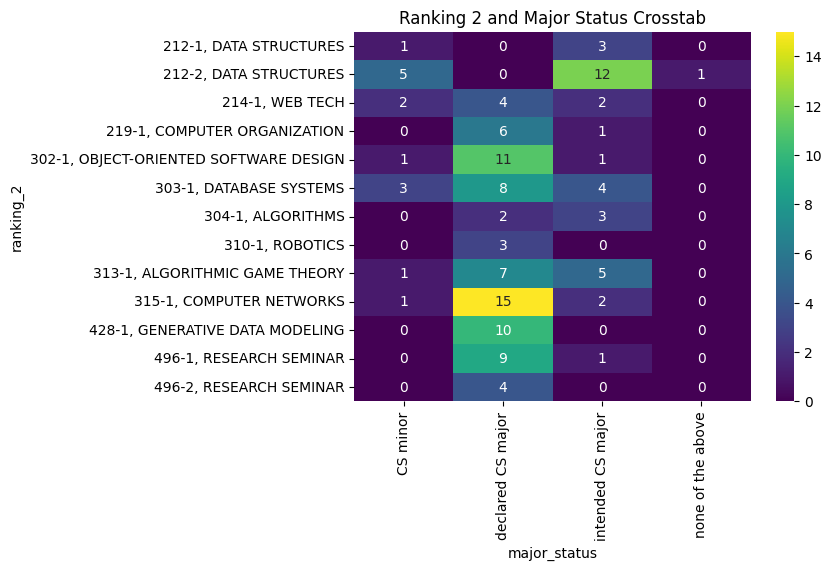

In [122]:
sns.heatmap(cross, annot=True, fmt="g", cmap='viridis')
plt.title('Ranking 2 and Major Status Crosstab')
plt.show()

In [123]:
# ranking_1 and num_ranked pivot table
pivot = pd.pivot_table(
    df, 
    index='ranking_1', 
    values=['num_ranked', 'desired_amount_of_courses', 'percieved_amount_of_courses_needed'],
    aggfunc=['mean', 'median', 'count', 'sum', 'std'])
pivot

mean             \
                                       desired_amount_of_courses num_ranked   
ranking_1                                                                     
212-1, DATA STRUCTURES                                  1.210526   1.315789   
212-2, DATA STRUCTURES                                  1.400000   1.800000   
214-1, WEB TECH                                         2.000000   7.333333   
219-1, COMPUTER ORGANIZATION                            2.000000   4.200000   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN                  2.250000   4.333333   
303-1, DATABASE SYSTEMS                                 1.750000   2.750000   
304-1, ALGORITHMS                                       2.818182   5.727273   
310-1, ROBOTICS                                         2.333333   5.333333   
313-1, ALGORITHMIC GAME THEORY                          2.000000   3.000000   
315-1, COMPUTER NETWORKS                                2.684211   4.368421   
428-1, GENERATIVE DATA MODELING                         2.000000   4.000000   
496-2, RESEARCH SEMINAR                                 2.571429   3.857143   

                                                                           \
                                       percieved_amount_of_courses_needed   
ranking_1                                                                   
212-1, DATA STRUCTURES                                           1.052632   
212-2, DATA STRUCTURES                                           1.400000   
214-1, WEB TECH                                                  1.666667   
219-1, COMPUTER ORGANIZATION                                     1.650000   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN                           2.083333   
303-1, DATABASE SYSTEMS                                          1.250000   
304-1, ALGORITHMS                                                2.363636   
310-1, ROBOTICS                                                  1.777778   
313-1, ALGORITHMIC GAME THEORY                                   1.500000   
315-1, COMPUTER NETWORKS                                         2.578947   
428-1, GENERATIVE DATA MODELING                                  1.250000   
496-2, RESEARCH SEMINAR                                          2.000000   

                                                          median             \
                                       desired_amount_of_courses num_ranked   
ranking_1                                                                     
212-1, DATA STRUCTURES                                         1          1   
212-2, DATA STRUCTURES                                         1          1   
214-1, WEB TECH                                                2          7   
219-1, COMPUTER ORGANIZATION                                   2          3   
302-1, OBJECT-ORIENTED SOFTWARE DESIGN                         2          3   
303-1, DATABASE SYSTEMS                                        2          3   
304-1, ALGORITHMS                                              3          5   
310-1, ROBOTICS                                                2          5   
313-1, ALGORITHMIC GAME THEORY                                 2          3   
315-1, COMPUTER NETWORKS                                       3          5   
428-1, GENERATIVE DATA MODELING                                2          3   
496-2, RESEARCH SEMINAR                                        3          3   

                                                                           \
                                       percieved_amount_of_courses_needed   
ranking_1                                                                   
212-1, DATA STRUCTURES                                                1.0   
212-2, DATA STRUCTURES                                                1.0   
214-1, WEB TECH                                                       2.0   
219-1, COMPUTER ORGANIZATION                                          